In [1]:
from google.colab import files
upload = files.upload()

Saving Online Sales Data.csv to Online Sales Data.csv


In [2]:
import pandas as pd
import numpy as np
import io

In [3]:
df = pd.read_csv(io.BytesIO(upload["Online Sales Data.csv"]))

In [4]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,01-01-2024,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,02-01-2024,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,03-01-2024,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,04-01-2024,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,05-01-2024,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [5]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

In [6]:
# Create Month, Year new column for analysis
df["Month"] = pd.to_datetime(df["Date"], dayfirst=True).dt.month
df["Month Name"] = pd.to_datetime(df["Date"], dayfirst=True).dt.strftime("%b")
df["Year"] = pd.to_datetime(df["Date"], dayfirst=True).dt.year

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

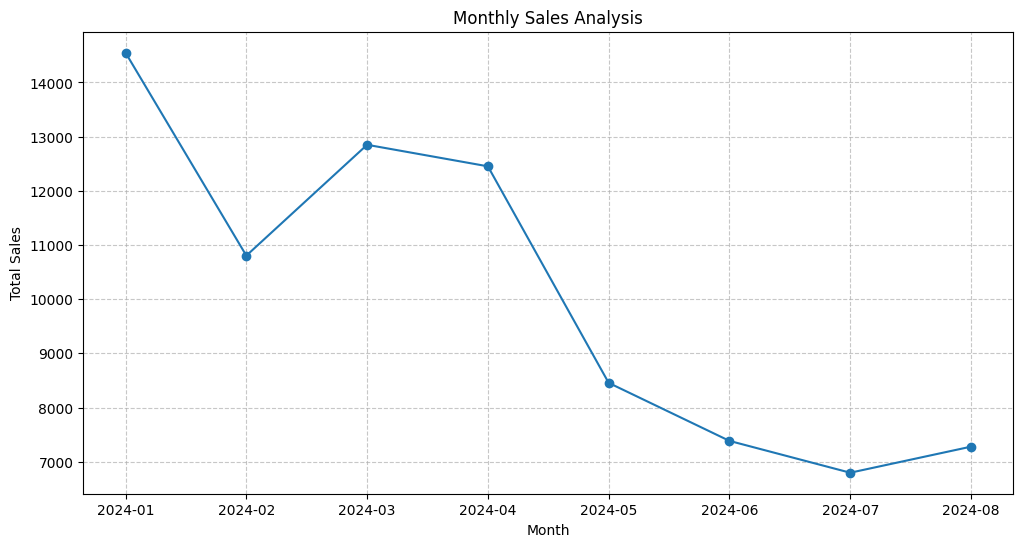

In [8]:
# Overall Sales Analysis
plt.figure(figsize=(12, 6))
monthly_sales = df.groupby(df["Date"].dt.strftime("%Y-%m"))["Total Revenue"].sum().reset_index()
plt.plot(monthly_sales["Date"], monthly_sales["Total Revenue"], marker="o")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Analysis")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

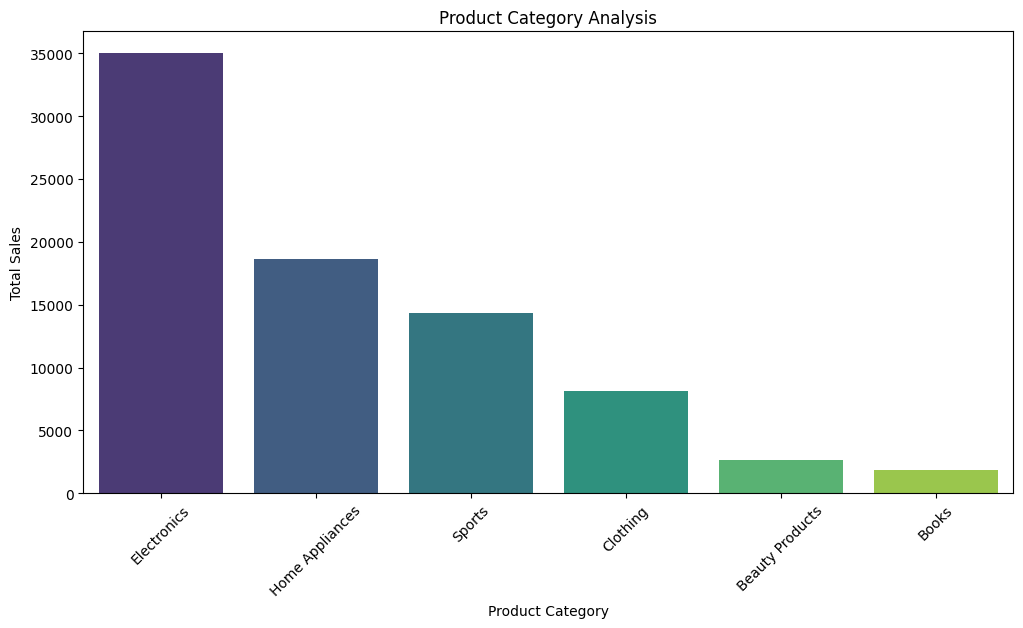

In [9]:
# Product Category Analysis
plt.figure(figsize=(12, 6))
product_sales = df.groupby(df["Product Category"])["Total Revenue"].sum().sort_values(ascending=False).reset_index()
sns.barplot(x=product_sales["Product Category"], y=product_sales["Total Revenue"], palette="viridis", hue=product_sales['Product Category'], legend=False)
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.title("Product Category Analysis")
plt.xticks(rotation=45)
plt.show()

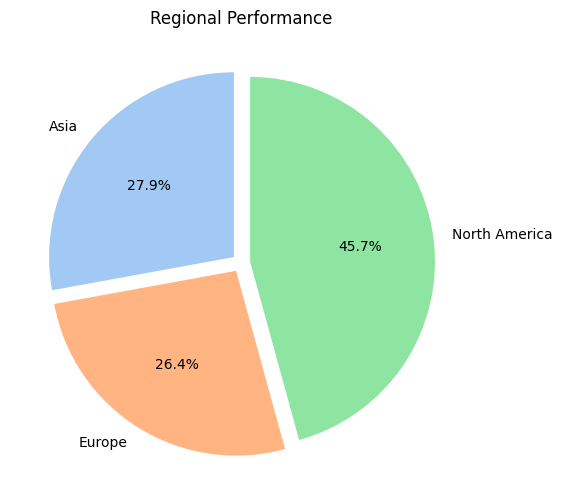

In [24]:
# Regional Performance
plt.figure(figsize=(12, 6))
region_sales = df.groupby(df["Region"])["Total Revenue"].sum()
plt.pie(region_sales, labels=region_sales.index, autopct="%1.1f%%", explode=[0.05]*len(region_sales), startangle=90, colors=sns.color_palette("pastel"))
plt.title("Regional Performance")
plt.show()

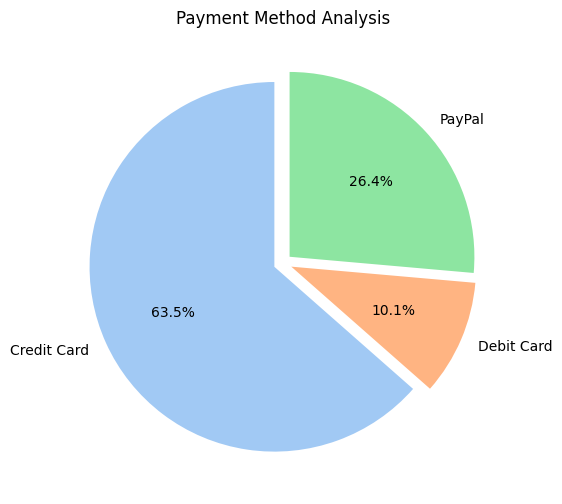

In [25]:
# Payment method analysis
plt.figure(figsize=(12, 6))
payment_method_sales = df.groupby(df["Payment Method"])["Total Revenue"].sum()
plt.pie(payment_method_sales, labels=payment_method_sales.index, autopct="%1.1f%%", explode=[0.05]*len(payment_method_sales), startangle=90, colors=sns.color_palette("pastel"))
plt.title("Payment Method Analysis")
plt.show()

<Figure size 1200x600 with 0 Axes>

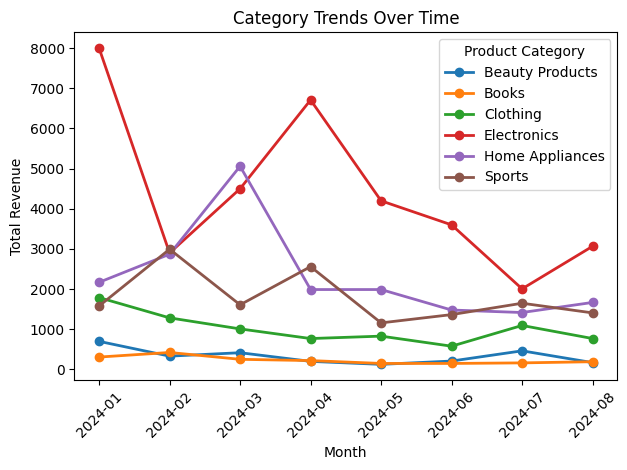

In [34]:
# Category Trends Over Time
plt.figure(figsize=(12, 6))
category_trends = df.pivot_table(index=df["Date"].dt.strftime("%Y-%m"), columns="Product Category", values="Total Revenue", aggfunc="sum").fillna(0)
category_trends.plot(marker="o", linewidth=2)
plt.title("Category Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.legend(title="Product Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()